# Problem: Matris Manipülasyonu

Size her ikisi de 2B NumPy dizileri olarak temsil edilen A ve B olmak üzere iki kare matris verilir. Göreviniz, aşağıdaki matris işlemlerini gerçekleştirmektir:

A ve B matrislerinin eleman bazında toplamını hesaplayın ve sonucu yeni bir C matrisinde saklayın.
A ve B'nin matris çarpımını hesaplayın ve sonucu yeni bir matris olan D'de saklayın.
A matrisinin determinantını bulun.
B matrisinin devriğini alın.
A ve B matrislerini girdi olarak alan ve C, D matrislerini, A'nın determinantını ve B'nin devrik matrisini döndüren bir Python işlevi yazın.

Fonksiyonunuzun yapısı şu şekilde olmalıdır.

In [ ]:
import numpy as np

def matrix_operations(A, B):
    # Your code here

    return C, D, determinant_A, transposed_B

# Not:

Matris çarpımını hesaplamak için, NumPy'de matris çarpımı için np.dot() veya @
operatörünü kullanabilirsiniz.

A matrisinin determinantını hesaplamak için np.linalg.det() yöntemini kullanabilirsiniz.

B matrisini transpoze etmek için np.transpose() işlevini veya .T özniteliğini kullanabilirsiniz.

In [ ]:
# @title
import numpy as np

def matrix_operations(A, B):
    # Calculate the element-wise sum of matrices A and B
    C = A + B

    # Calculate the matrix product of A and B
    D = np.dot(A, B)
    # Alternatively, you can use the @ operator for matrix multiplication:
    # D = A @ B

    # Find the determinant of matrix A
    determinant_A = np.linalg.det(A)

    # Transpose matrix B
    transposed_B = np.transpose(B)
    # Alternatively, you can use the .T attribute:
    # transposed_B = B.T

    return C, D, determinant_A, transposed_B

# Matris Çarpımı

Basitçe iki matrisi çarpan bir kod yazınız.

Pythonda bu özellik otomatik olarak tanımlı olduğu için özelliği kullanmak yerine matrisleri 1. matrisin 1. satırı ile 2. matrisin kolonlarını tek tek çarpıp yeni matrise yazacak şekilde algoritmanızı geliştiriniz

Dikkat etmeniz gereken bir diğer konu ise iki matris çarpılamaz durumda ise durumu göz önünde bulundurarak bir hata mesajı yayınlamanız gerektiğidir.

In [ ]:
import numpy as np

# Matrix multiplier
def multiply_matrices(matA, matB):
    sizeA = np.shape(matA)
    sizeB = np.shape(matB) # boyutları hesapla
    # sonuc boyutu olucak kadar sıfırlarla dolu bir matris olustur
    result = np.zeros((sizeA[0], sizeB[1]), dtype=np.float64)

    # 1. matrisin sutunu ve 2. matrisin satırı esit olmazsa hata mesajı bastır.
    if (sizeA[1] != sizeB[0]):
        print("Matrix sizes are improper for multiplication")
        return

    # Elementer matris carpimi
    for indexA in range(sizeA[0]):
        for indexB in range(sizeB[1]):
            sumValue = sum(matA[indexA] * matB[:, indexB])
            result[indexA][indexB] = sumValue
    return result

In [ ]:
matA = np.random.randint(0, 10, size=[5,3])
matB = np.random.randint(0, 10, size=[3,4])
multiply_matrices(matA, matB)

array([[116.,  81.,  42.,  59.],
       [104.,  75.,  43.,  57.],
       [ 74.,  57.,  31.,  52.],
       [ 36.,  30.,  16.,  32.],
       [ 84.,  63.,  36.,  53.]])

In [ ]:
np.dot(matA, matB).astype(float)

array([[116.,  81.,  42.,  59.],
       [104.,  75.,  43.,  57.],
       [ 74.,  57.,  31.,  52.],
       [ 36.,  30.,  16.,  32.],
       [ 84.,  63.,  36.,  53.]])

In [ ]:
matA = np.random.randint(0, 10, size=[3,5])
matB = np.random.randint(0, 10, size=[7,4])
multiply_matrices(matA, matB)

Matrix sizes are improper for multiplication


### NUMPY SIFIR VE BİR MATRİSLERİ

NumPy'ın sunmuş olduğu en büyük özelliklerden birisi de matrisleri kolayca tanımlama ve iç içe yazabilme özelliğidir. Özellikle sadece sıfır veya sadece birlerden oluşan matrisleri istenilen boyutlarda kolayca oluşturabilirsiniz:

--> Sıfır matrisi: numpy.zeros((size), dtype=type)

--> Bir matrisi: numpy.ones((size), dtype=type)

# PROBLEM: KARE MATRİS İSKELETİ OLUŞTURMA

Elimizde bulunan numpy imkanlarını da kullanarak dış katmanı her seferinde birlerden oluşan ve katmanlar içe doğru ilerledikçe bir tane sıfır bir tane bir katmanı olacak şekilde ilerleyen bir fonksiyon yazınız.

Probleme yaklaşma kolaylığı bakımından birkaç ipucu verilecek olursa:

--> Öncelikle istenilen boyutlarda iç içe kaç tane sıfır ve bir katmanı sığacağını bulunuz. Her katman 1 birim kalınlıkta olacağından sağ ve soldan 2 üst ve alttan 2 boyutluk matris alanı kaplayacaktır.

--> Her seferinde dış katman birlerden oluşacağı için bir matrislerine öncelik veriniz.

--> En nihayetinde en geniş 1 matrisinin içine en geniş 0 matrisini uygun şekilde yerleştiriniz. Ardından en genişten bir dar olan 1 matrisini en geniş sıfır matrisinin içine yerleştiriniz ve bu işlemi bir döngü olarak tekrar ediniz.

## BODY FONKSİYONU

--> def createAvailableSkeleton(size) yapısında bulunmalıdır.

--> döndürdüğü değer iç içe 1 ve 0 barındıran tek bir arraydir

In [ ]:
def createAvailableSkeleton(size):
    outers, inners = [], []  # 1, 0
    oIndexes = np.arange(0, size, 4)  # 0, 4, 8, 16
    iIndexes = np.arange(2, size, 4)  # 2, 6, 10, 14, 18

    # 1lerden olusan matrisleri doldurma
    for o in oIndexes:
        addedArray = np.ones((size-o, size-o), dtype=int)
        outers.append(addedArray)
    # 0lardan olusan matrisleri doldurma
    for i in iIndexes:
        addedArray = np.zeros((size-i, size-i), dtype=int)
        inners.append(addedArray)
    totalLen = len(outers) + len(inners)

    # donus arrayini 1lerden olusan en buyuk matrise esitledik
    returnArray = outers[0]
    for k in range(1, totalLen):
        # eger dongu sayısı tek ise o zaman 1lerin içine 0 yerlestiriyoruz
        if k % 2 == 1:
            returnArray[k:size-k, k:size-k] = inners[int((k-1)/2)]
        # eger dongu sayısı cift ise o zaman 0larin içine 1 yerlestiriyoruz
        else:
            returnArray[k:size-k, k:size-k] = outers[int((k)/2)]
    return returnArray

In [ ]:
# SAMPLE OUT
createAvailableSkeleton(10)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [ ]:
createAvailableSkeleton(20)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0, 0,


## PLOT FONKSİYONU

--> Derste göreceğimiz görselleştirme tekniklerinden birisi olan matplotlib.imshow() tekniği kullanılarak bir plot fonksiyonu yazılmıştır.

--> plotSkeleton() fonksiyonu içerisine verilen skeleton parametresi yazmış olduğunuz fonksiyonun kendisi olacaktır. inner_size parametresi de fonksiyonunuzun aldığı size parametresidir. Bu şekilde fonksiyon çıktınızı görselleştirebilirsiniz.

In [ ]:
import matplotlib.pyplot as plt

def plotSkeleton(skeleton, inner_size=20):
    skltn = skeleton(inner_size)
    plt.imshow(skltn, cmap='Greys')
    plt.gcf().set_size_inches(10, 10)

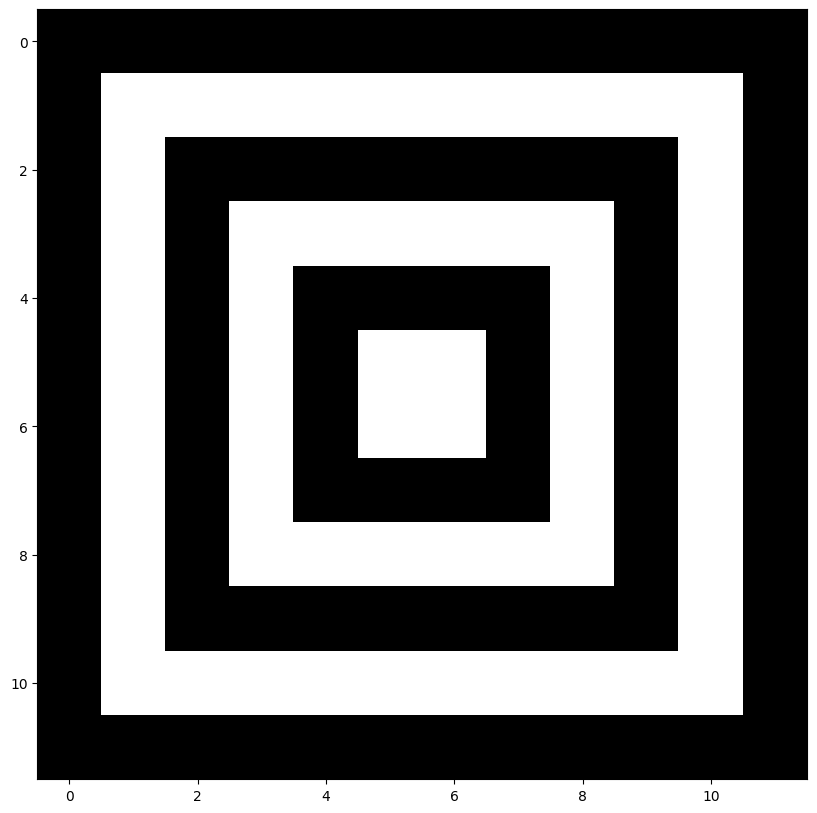

In [ ]:
plotSkeleton(createAvailableSkeleton, 12)

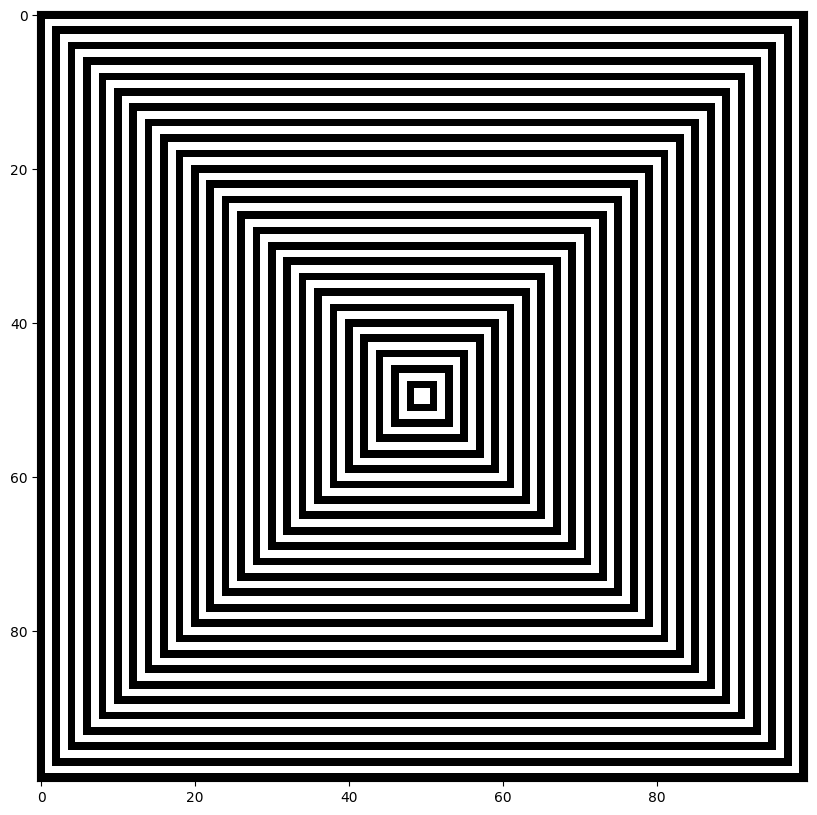

In [ ]:
plotSkeleton(createAvailableSkeleton, 100)